In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [3]:
df = pd.read_csv("train.csv")

In [4]:
import seaborn as sn

## Prices Distribution(all)

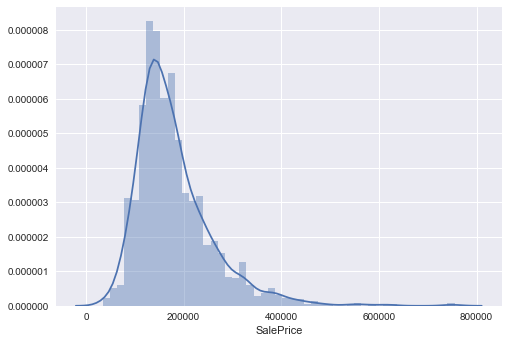

In [12]:
price = df['SalePrice']
sn.distplot(price)

## 2007 House Price

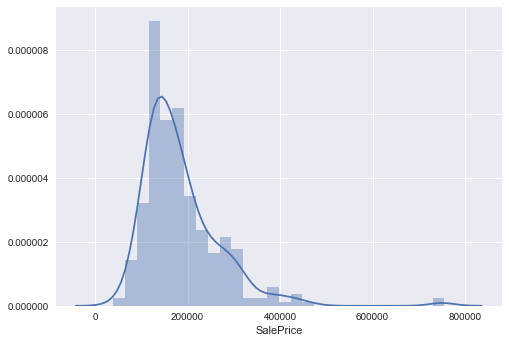

In [8]:
year_price = df.loc[df['YrSold'] == 2007]
sn.distplot(year_price['SalePrice'])

## 2008 House Price

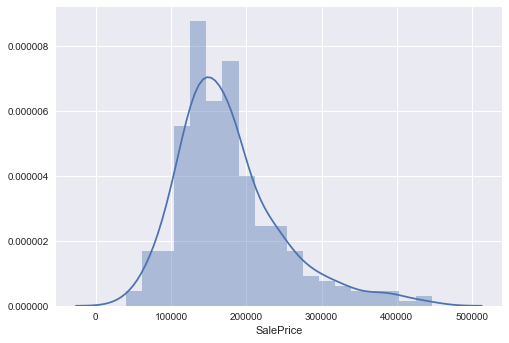

In [6]:
year_price = df.loc[df['YrSold'] == 2008]
m, n = year_price.shape
sn.distplot(year_price['SalePrice'])

## 2009 House Price

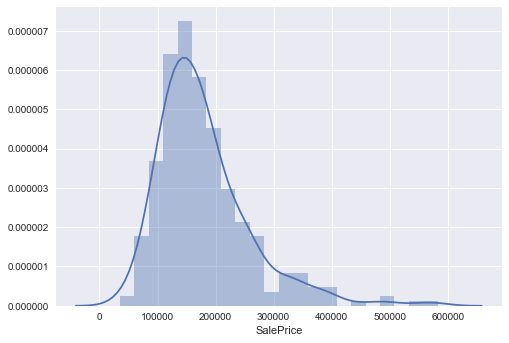

In [5]:
year_price = df.loc[df['YrSold'] == 2009]
m, n = year_price.shape
sn.distplot(year_price['SalePrice'])

## 2010 House Price

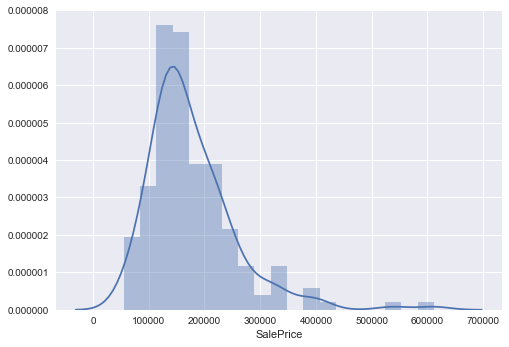

In [7]:
year_price = df.loc[df['YrSold'] == 2010]
m, n = year_price.shape
sn.distplot(year_price['SalePrice'])

In [51]:
year_count = df['YrSold'].value_counts()

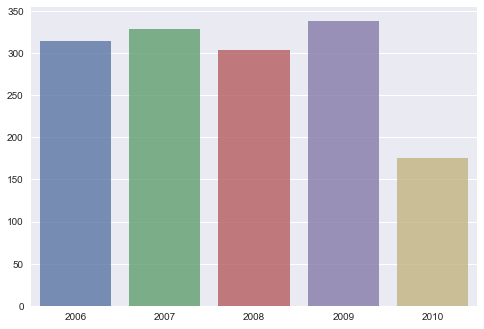

In [52]:
sn.barplot(year_count.index, year_count.values, alpha=0.8)

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

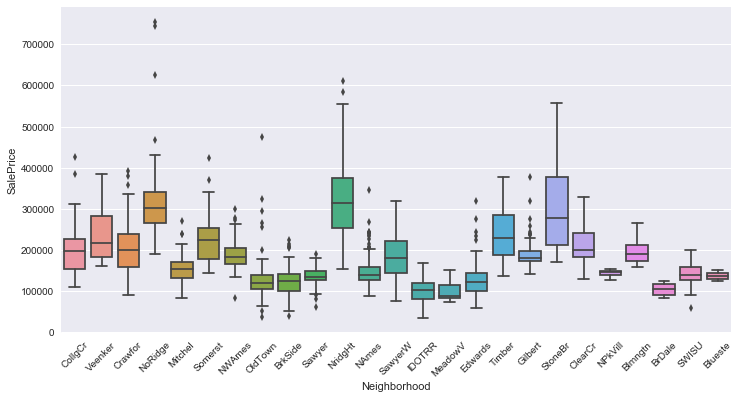

In [25]:
plt.figure(figsize = (12, 6))
sn.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

## The correlation between year and sale price.

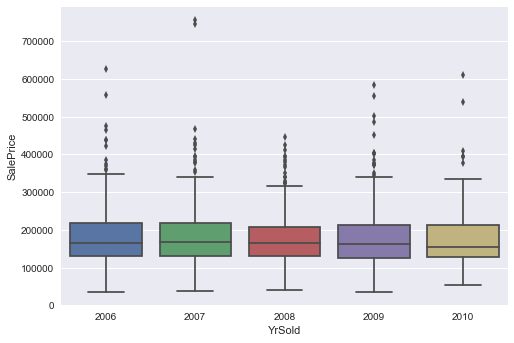

In [26]:
sn.boxplot(x='YrSold', y='SalePrice', data=df)

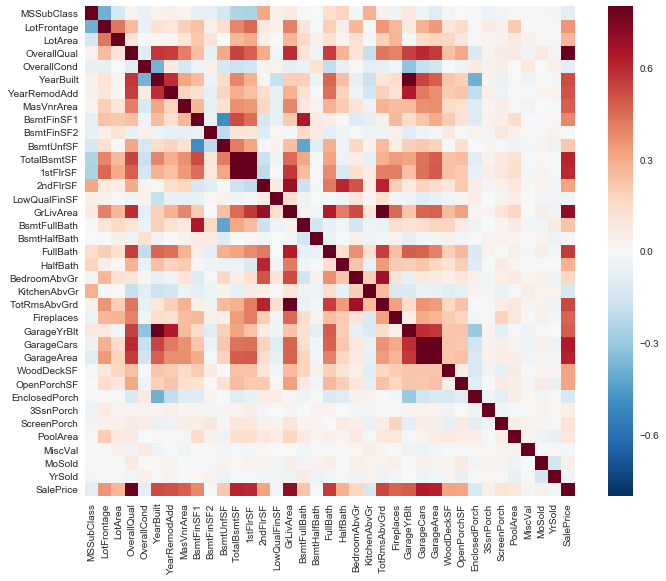

In [40]:
#correlation matrix
df_ = df.ix[:, 1:]
corrmat = df_.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat, vmax=.8, square=True);

Ae we see, in the heat map, the correlation between 'YrSold' and all other features is very small. 

In [46]:
df.select_dtypes(include = ['float64', 'int64']).apply(lambda x: x.corr(df['SalePrice']))

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

In [53]:
corr_price = df.select_dtypes(include = ['float64', 'int64']).ix[:, 1:-1].apply(lambda x: x.corr(df['SalePrice']))

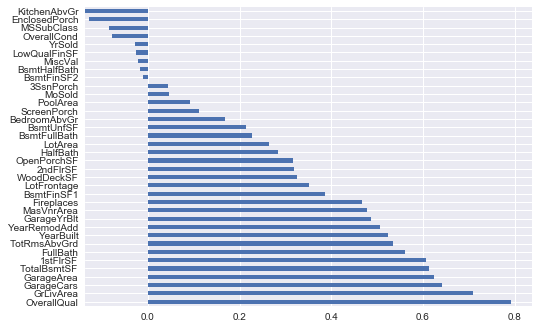

In [70]:
corr_price.sort_values(ascending=False).plot.barh()

In [71]:
corr_price.sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [29]:
missing_rate = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [30]:
missing_rate[:10]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

If the missing rate is greater than 15%, we should consider dropping them from our dataset since they are not very important for predicting the hosue price.

In [33]:
dropped_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

In [7]:
df.drop(dropped_cols, axis=1, inplace=True)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


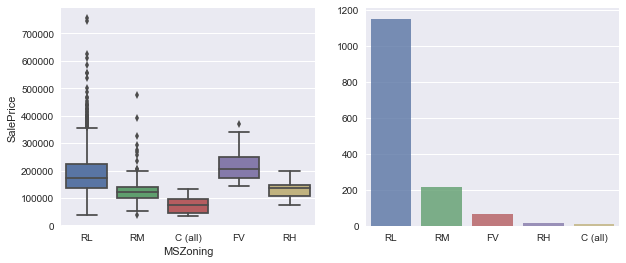

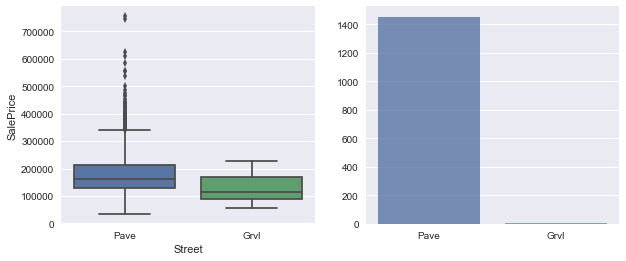

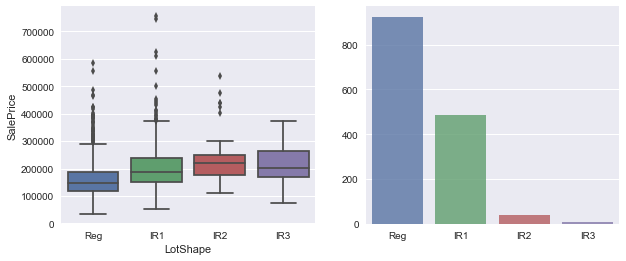

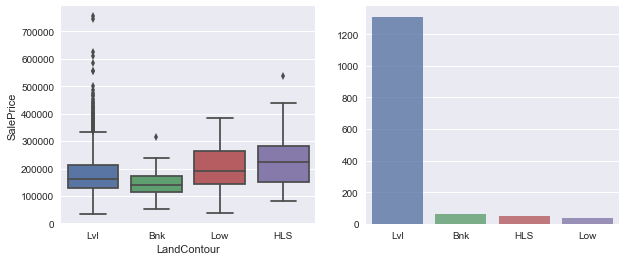

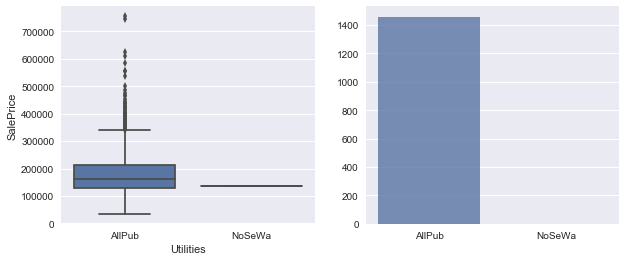

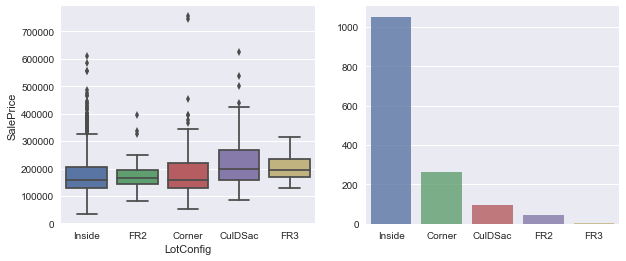

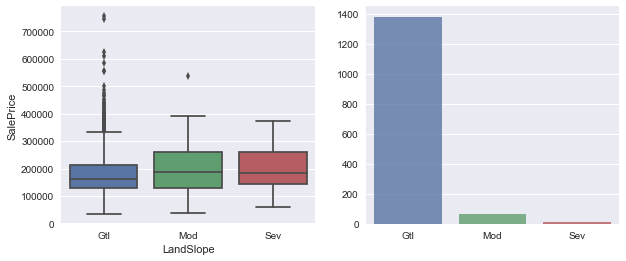

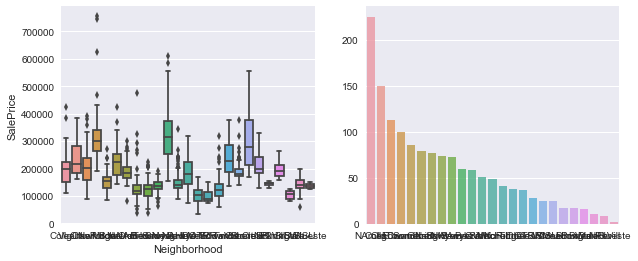

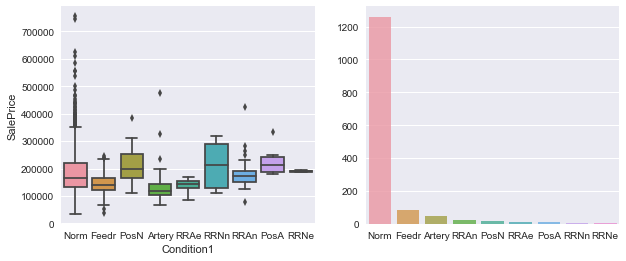

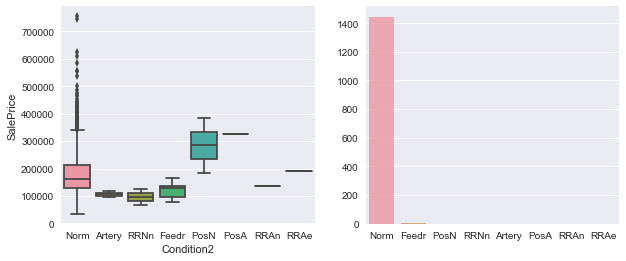

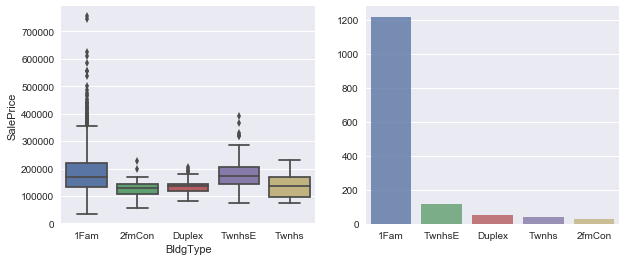

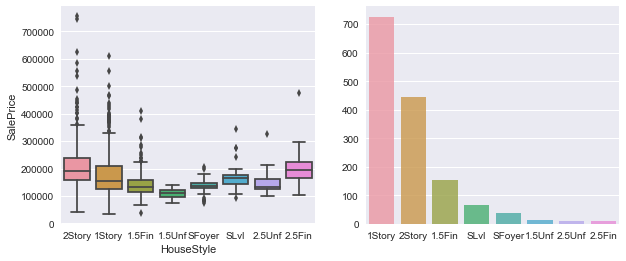

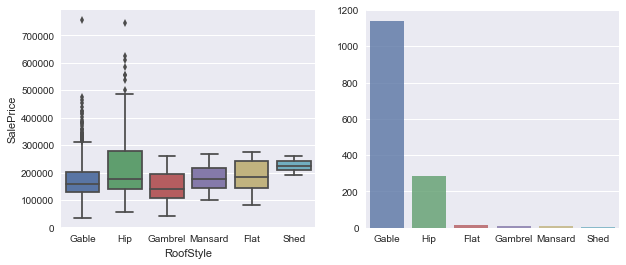

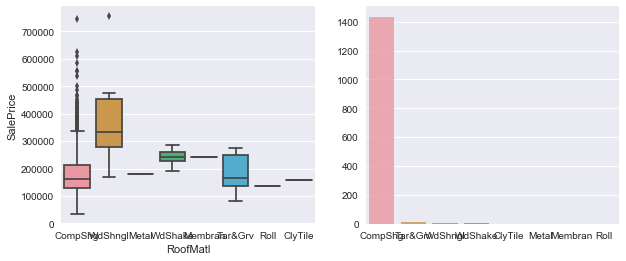

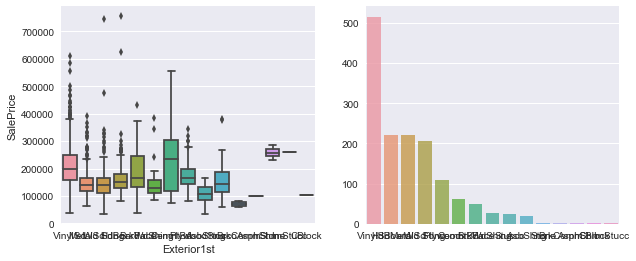

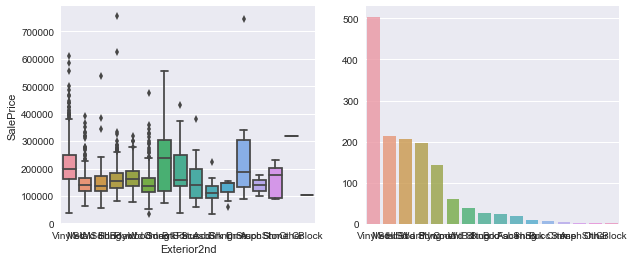

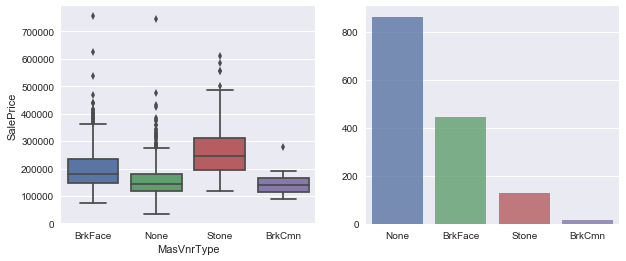

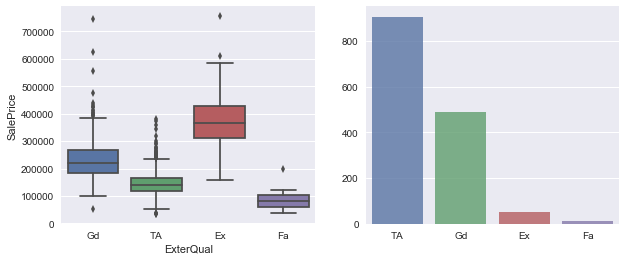

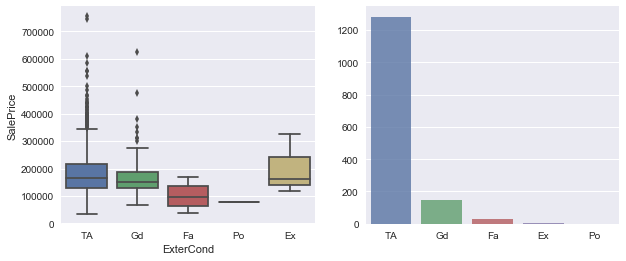

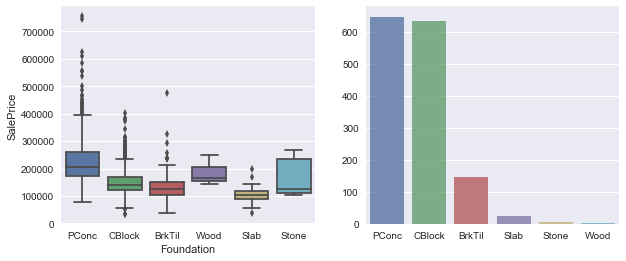

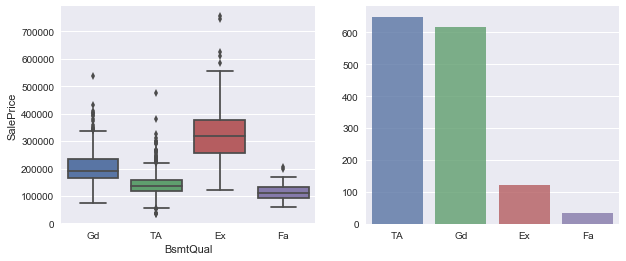

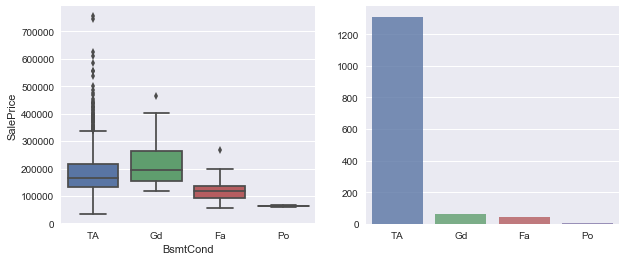

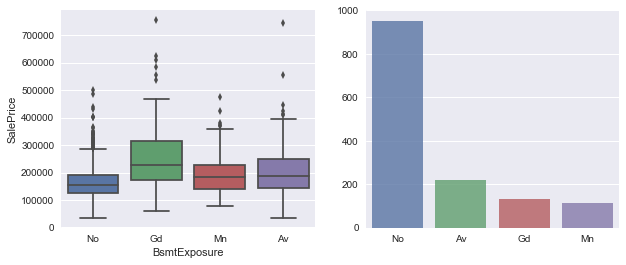

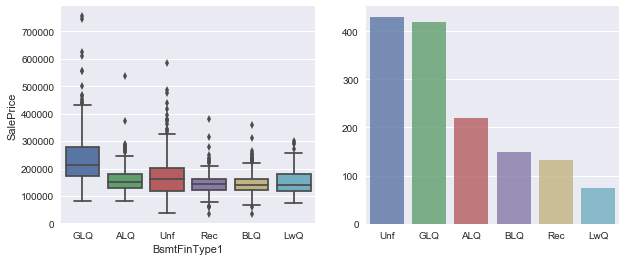

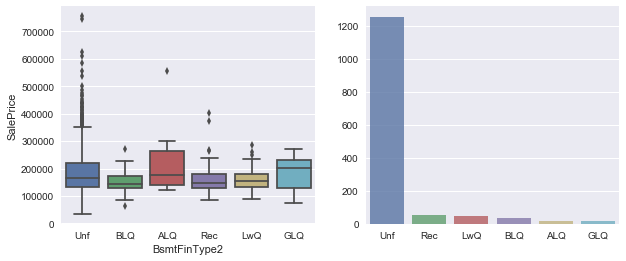

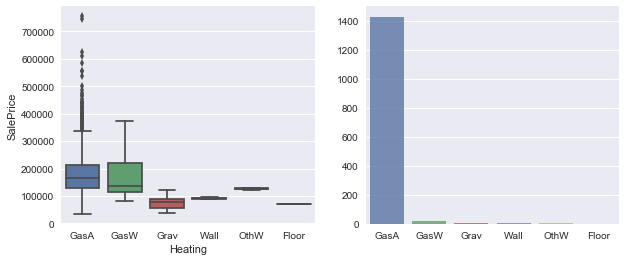

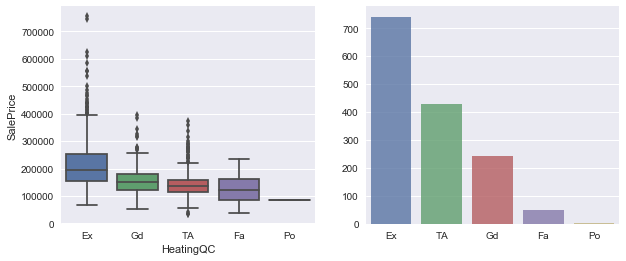

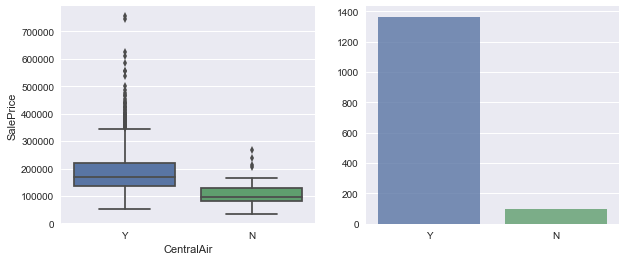

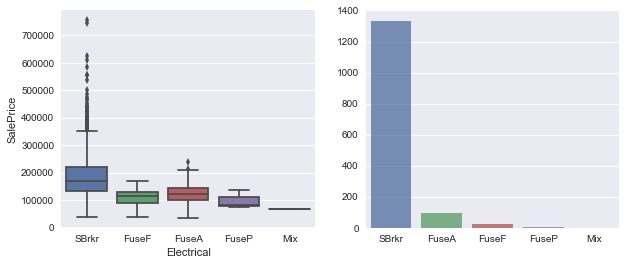

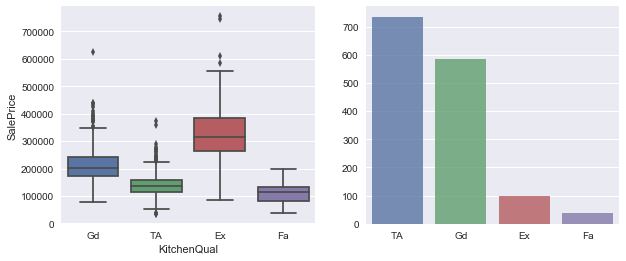

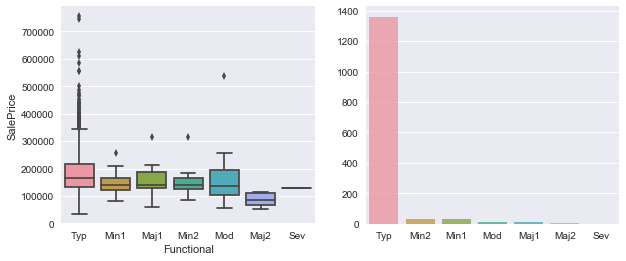

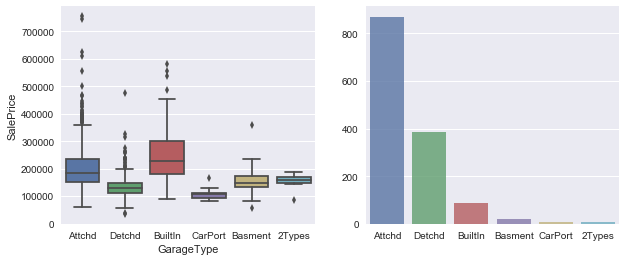

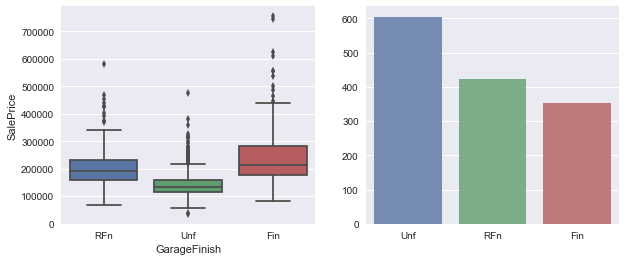

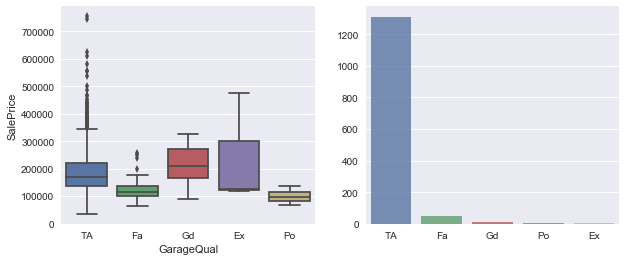

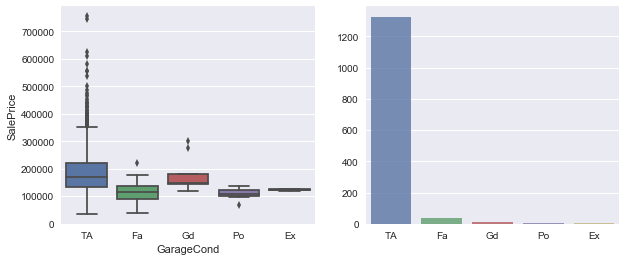

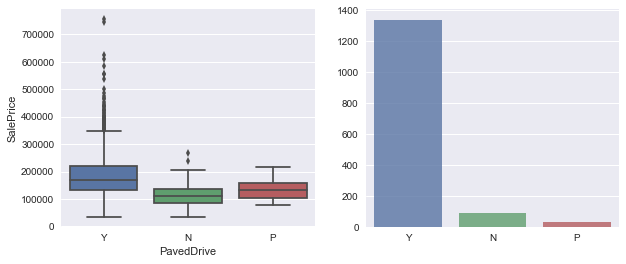

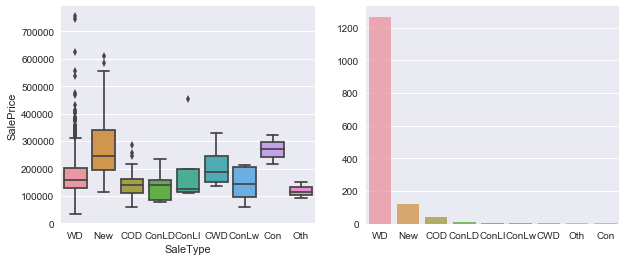

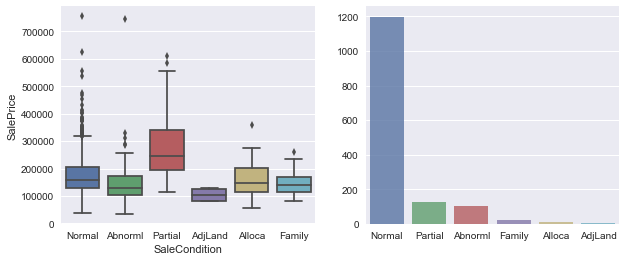

In [39]:
# Categorical features.
obj_vars = df.select_dtypes(include = ['object'])
for var in obj_vars.columns:
    var_count = df[var].value_counts()
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    sn.boxplot(var, 'SalePrice', data=df, ax=ax[0])
    sn.barplot(var_count.index, var_count.values, alpha=0.8)

## Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE)[[Wiki]](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Accoring to the requirements, the score is calculated by:
\begin{equation*}
{\sqrt{\sum^n(\log(pred_i) - \log(true_i))^2)}}
\end{equation*}

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def model_score(model_generator, train_X, y, parameters={}):
    model = model_generator(**parameters)
    rmse = np.sqrt(-cross_val_score(model, train_X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

### House prices distribution

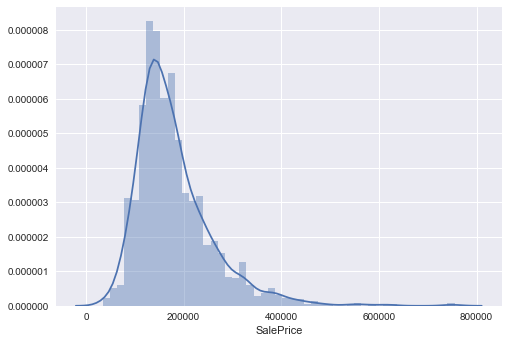

In [58]:
sn.distplot(sale_prices)

### Distribution after log transformation 

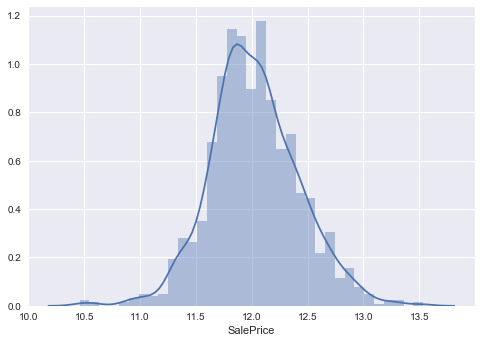

In [62]:
sale_prices = np.log(sale_prices)
sn.distplot(sale_prices)

It seems like after log transformation, the data distribution are similiar with normal distribution.

Then let's dig into those categorical features. The easiest way we come up with is one-hot encoding. More can be found [here](https://en.wikipedia.org/wiki/One-hot)

### Preprocessing

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dropped_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
train.drop(dropped_cols, axis=1, inplace=True)
test.drop(dropped_cols, axis=1, inplace=True)

In [6]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [7]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
all_data = pd.get_dummies(all_data)

In [8]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

## Ordinary Linear Regression

In [82]:
%time model_score(LinearRegression, X_train, y).mean()

CPU times: user 504 ms, sys: 38.5 ms, total: 542 ms
Wall time: 638 ms


0.13916362912549782

In [81]:
from sklearn import svm
%time model_score(svm.SVR, X_train, y).mean()

CPU times: user 1.96 s, sys: 36.1 ms, total: 1.99 s
Wall time: 2.13 s


0.26667963741823331

In [80]:
%time model_score(svm.NuSVR, X_train, y).min()

CPU times: user 5.15 s, sys: 68.5 ms, total: 5.22 s
Wall time: 5.43 s


0.24068577006367153

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [84]:
clf = GridSearchCV(svm.SVR(), param_grid)

In [ ]:
clf.fit(X_train, y)

In [9]:
import xgboost as xgb

In [10]:
dtrain = xgb.DMatrix(X_train)

In [11]:
dtrain_price = xgb.DMatrix(y)

In [12]:
dtrain_price

In [18]:
param = {"learning_rate":0.01,"max_depth":4,"n_estimators":7200}

In [15]:
num_round = 2

In [19]:
bst = xgb.XGBRegressor(**param)

In [21]:
bst.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=7200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [28]:
xg_pred = bst.predict(X_train)

In [23]:
xg_pred

array([ 11.70524406,  12.01887989,  12.1465435 , ...,  11.79736805,
        11.63757324,  12.33807373], dtype=float32)

In [24]:
inv_log_prices = np.expm1(xg_pred)

In [25]:
inv_log_prices

array([ 121204.6640625,  165855.78125  ,  188440.609375 , ...,
        132901.09375  ,  113273.9375   ,  228220.90625  ], dtype=float32)

In [26]:
pred_df = pd.DataFrame(inv_log_prices, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('submission_xg.csv', header=True, index_label='Id')

In [27]:
from sklearn.metrics import mean_squared_error

In [32]:
np.sqrt(mean_squared_error(y, xg_pred))

0.016978325280424811

In [36]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 10))
    return rmse

In [34]:
reg_cv = xgb.XGBRegressor(**param)

In [37]:
rmse_cv(reg_cv)

array([ 0.12361622,  0.09668647,  0.10291427,  0.16739285,  0.14309605,
        0.10898158,  0.13445083,  0.10415874,  0.10886646,  0.13642499])